In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

## Import and clean data into usable format

In [138]:
df = pd.read_csv('nyc_crime.csv', header=4, skipfooter=3)

c:\users\mtracy\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [139]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Unnamed: 13
0,Adams Village,"1,861",0,0,NaN,0,0,0,12,2,10,0,0.0,NaN
1,Addison Town and Village,"2,577",3,0,NaN,0,0,3,24,3,20,1,0.0,NaN
2,Akron Village,"2,846",3,0,NaN,0,0,3,16,1,15,0,0.0,NaN
3,Albany,"97,956",791,8,NaN,30,227,526,"4,090",705,"3,243",142,NaN,NaN
4,Albion Village,"6,388",23,0,NaN,3,4,16,223,53,165,5,NaN,NaN


In [140]:
#remove extra column
del df['Unnamed: 13']

In [141]:
#rename columns
df.columns = ['city', 'population', 'violent_crimes', 'murder', 'rape1', 'rape2', 'robbery', 'assault', 'property', 
              'burglary', 'larceny_theft', 'vehicle_theft', 'arson']

In [142]:
#delete rape1 - this column doesn't tell us any information.  All rape data in rape2 column.
del df['rape1']

In [143]:
df.dtypes

city               object
population         object
violent_crimes     object
murder              int64
rape2              object
robbery            object
assault            object
property           object
burglary           object
larceny_theft      object
vehicle_theft      object
arson             float64
dtype: object

In [144]:
#remove commas
df['population'] = df['population'].apply(lambda x: str(x).replace(',', ''))
df['violent_crimes'] = df['violent_crimes'].apply(lambda x: str(x).replace(',', ''))
df['property'] = df['property'].apply(lambda x: str(x).replace(',', ''))
df['larceny_theft'] = df['larceny_theft'].apply(lambda x: str(x).replace(',', ''))
df['rape2'] = df['rape2'].apply(lambda x: str(x).replace(',', ''))
df['robbery'] = df['robbery'].apply(lambda x: str(x).replace(',', ''))
df['assault'] = df['assault'].apply(lambda x: str(x).replace(',', ''))
df['property'] = df['property'].apply(lambda x: str(x).replace(',', ''))
df['burglary'] = df['burglary'].apply(lambda x: str(x).replace(',', ''))
df['larceny_theft'] = df['larceny_theft'].apply(lambda x: str(x).replace(',', ''))
df['vehicle_theft'] = df['vehicle_theft'].apply(lambda x: str(x).replace(',', ''))

#conver to numeric
df.population = pd.to_numeric(df.population)
df.violent_crimes = pd.to_numeric(df.violent_crimes)
df.murder = pd.to_numeric(df.murder)
df.rape2 = pd.to_numeric(df.rape2)
df.robbery = pd.to_numeric(df.robbery)
df.assault = pd.to_numeric(df.assault)
df.property = pd.to_numeric(df.property)
df.burglary = pd.to_numeric(df.burglary)
df.larceny_theft = pd.to_numeric(df.larceny_theft)
df.vehicle_theft = pd.to_numeric(df.vehicle_theft)


In [145]:
#confirm columns are all numeric
df.dtypes

city               object
population          int64
violent_crimes      int64
murder              int64
rape2               int64
robbery             int64
assault             int64
property            int64
burglary            int64
larceny_theft       int64
vehicle_theft       int64
arson             float64
dtype: object

In [146]:
#take a look at cleaned df
df.describe()

,population,violent_crimes,murder,rape2,robbery,assault,property,burglary,larceny_theft,vehicle_theft,arson
count,3.480000e+02,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,187.000000
mean,4.003763e+04,201.594828,1.566092,5.864943,72.902299,121.261494,792.606322,119.683908,637.017241,35.905172,1.871658
std,4.500374e+05,2815.268504,18.303673,60.425452,1031.032873,1706.131730,7659.724746,924.948789,6346.054451,403.423826,10.693411
min,5.260000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.003000e+03,2.000000,0.000000,0.000000,0.000000,1.000000,40.500000,6.000000,31.000000,0.000000,0.000000
50%,7.233500e+03,6.000000,0.000000,0.000000,1.000000,4.000000,112.500000,17.500000,94.000000,2.000000,0.000000
75%,1.842750e+04,22.000000,0.000000,2.000000,5.000000,14.000000,341.000000,51.250000,287.250000,7.000000,1.000000
max,8.396126e+06,52384.000000,335.000000,1112.000000,19170.000000,31767.000000,141971.000000,16606.000000,117931.000000,7434.000000,132.000000


In [147]:
# Remove arson column.  Too many missing fields to impute data.  Based on footnote in raw excel file, NaN fields represent
# cities where the data reporting wasn't done properly.

del df['arson']

## Explore variables

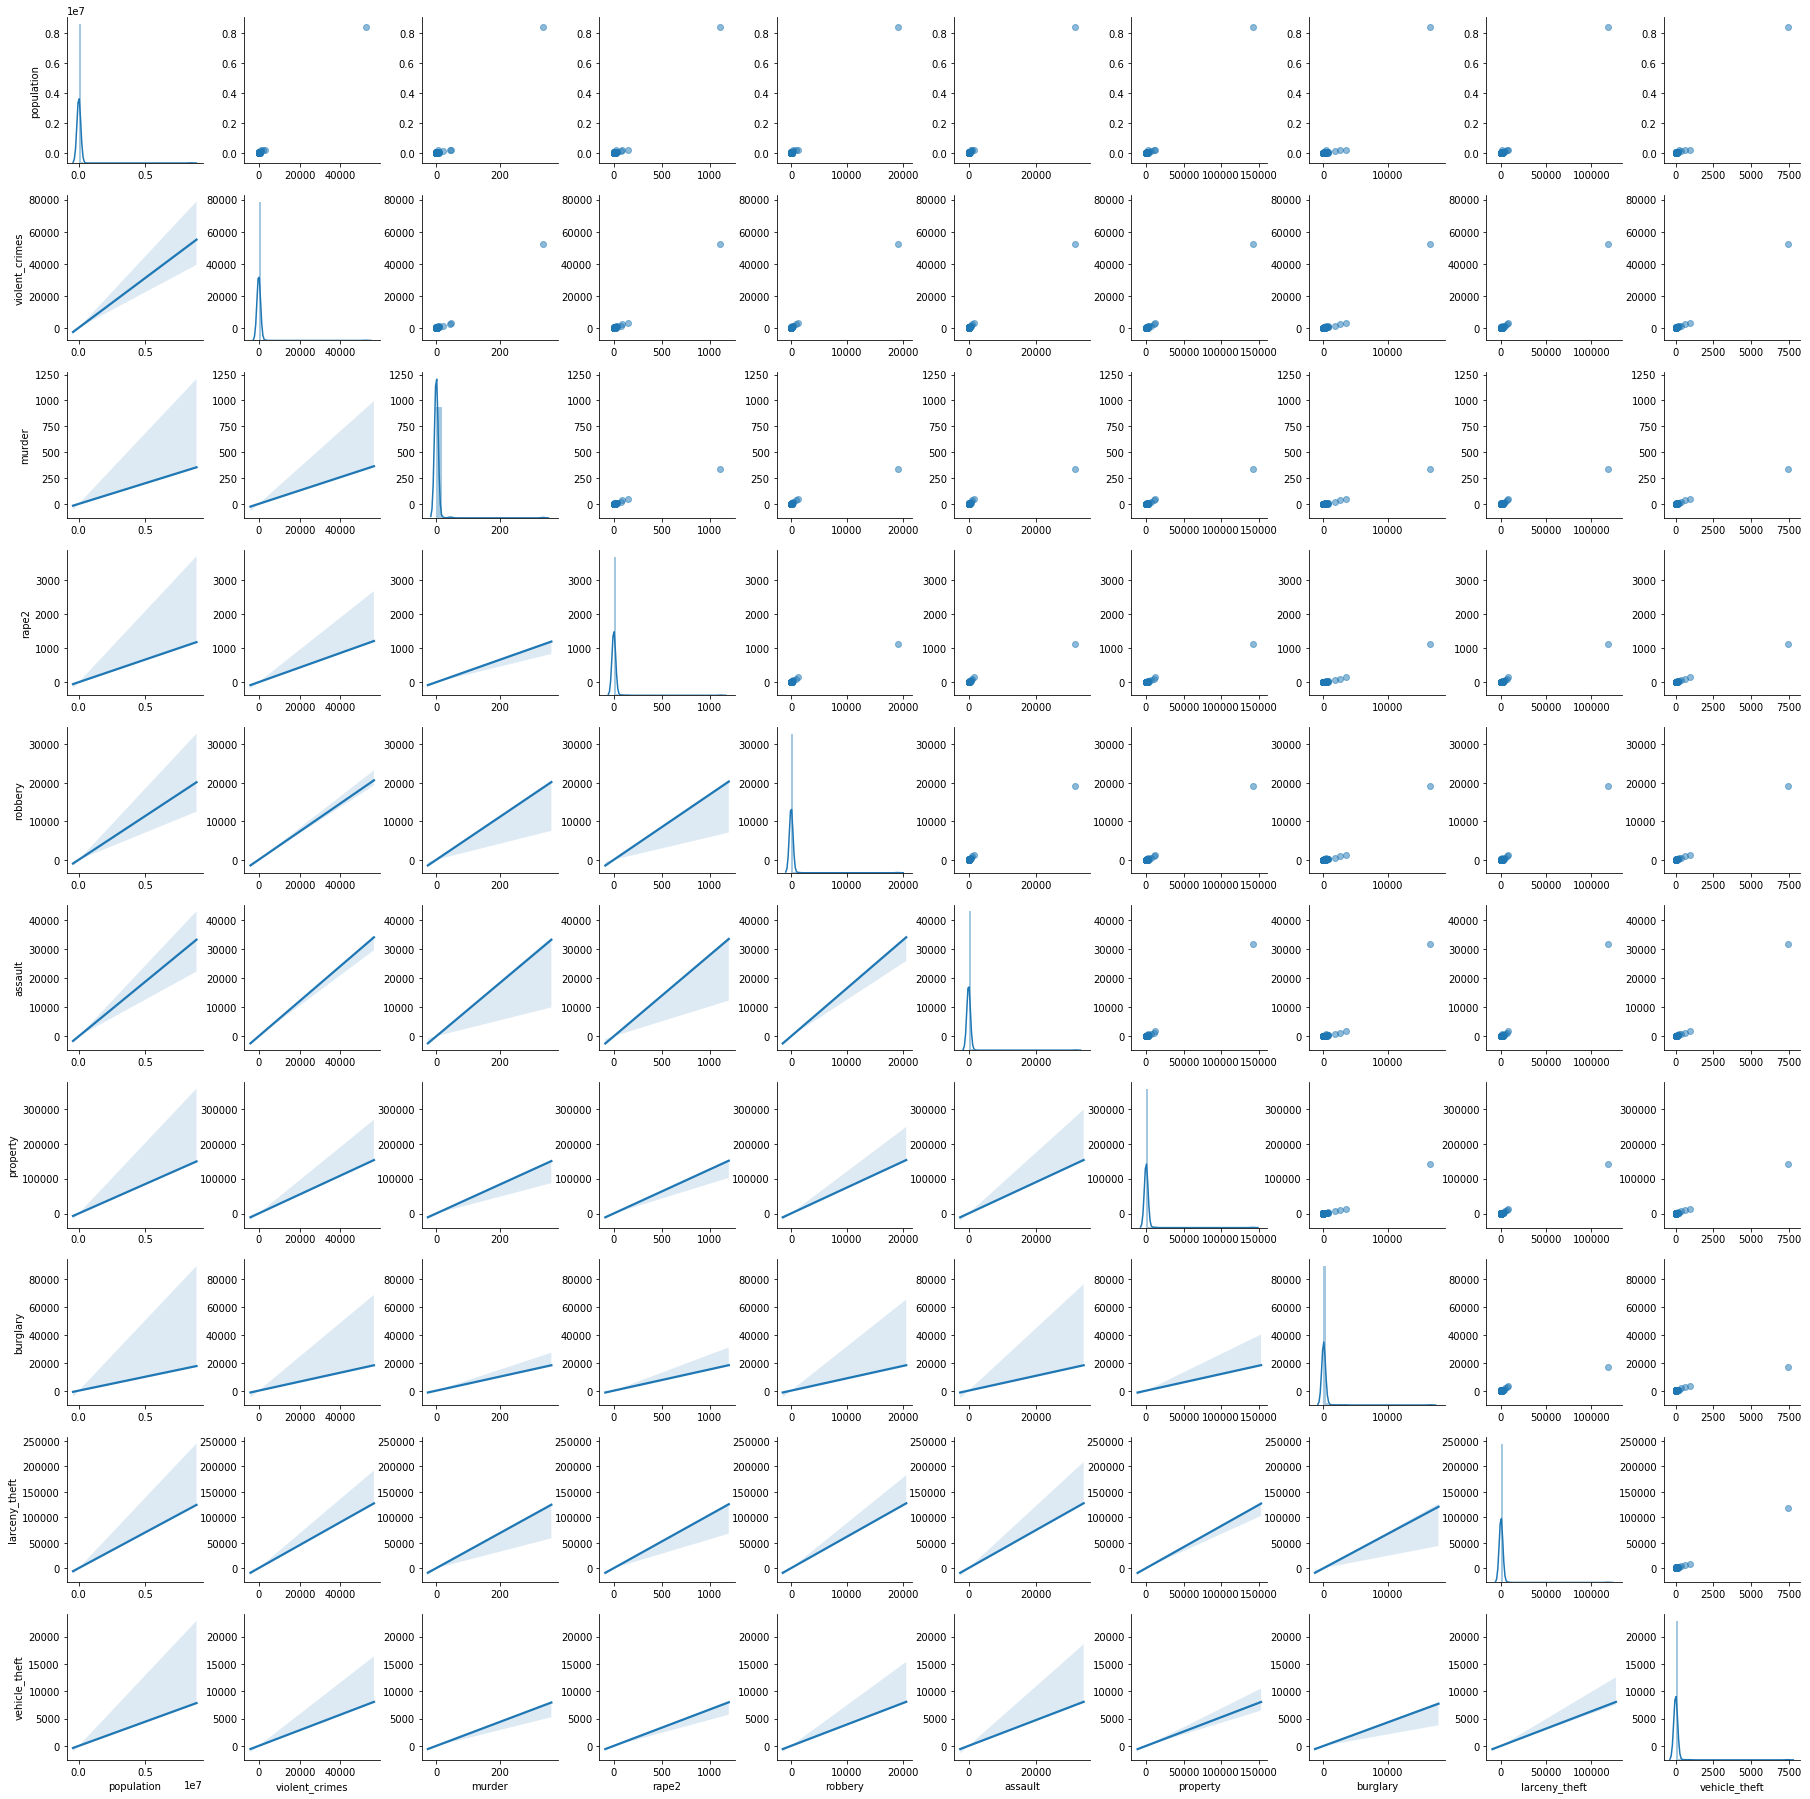

In [148]:
#explore remaining variables
#Declare scatterplot matrix
g = sns.PairGrid(df, diag_sharey=False)

#Set upper matrix to scatter
g.map_upper(plt.scatter, alpha=.5)

#Set lower matrix to regression lines
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))

#Set diagonals to distribution plot
g.map_diag(sns.distplot)
plt.show()

#Outliers present.  Leave in for now.  They represent NYC which has a substantially larger population than the other cities.

## Prepare data to input in model using the following regression:
$$ Property crime = \alpha + Population + Population^2 + Murder + Robbery$$

In [149]:
df['sq_population'] = df['population'] **2

In [150]:
df.head()

,city,population,violent_crimes,murder,rape2,robbery,assault,property,burglary,larceny_theft,vehicle_theft,sq_population
0,Adams Village,1861,0,0,0,0,0,12,2,10,0,3463321
1,Addison Town and Village,2577,3,0,0,0,3,24,3,20,1,6640929
2,Akron Village,2846,3,0,0,0,3,16,1,15,0,8099716
3,Albany,97956,791,8,30,227,526,4090,705,3243,142,9595377936
4,Albion Village,6388,23,0,3,4,16,223,53,165,5,40806544
